1. Susunlah penglihatan adit berikut menjadi satu gambar utuh!

In [475]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

script diatas merupakan tiga baris kode python yang mengimpor tiga library berbeda yaitu: cv2 merupakan library untuk pemrosesan gambar dan video, yang biasanya digunakan untuk membaca, menulis, dan memanipulasi citra. numpy merupakan library untuk komputasi numerik dalam Python, digunakan untuk mengolah data array dan matriks dengan cepat dan efisien. matplotlib.pyplot merupakan library untuk visualisasi data dalam bentuk grafik, seperti plot, histogram, dan diagram lainnya.

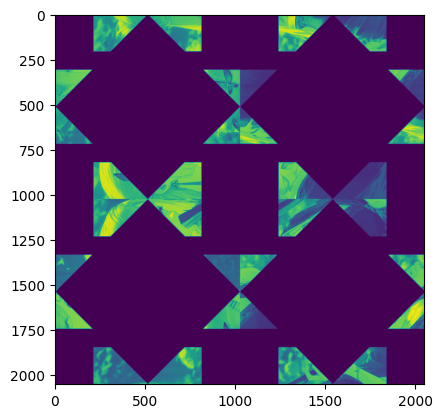

In [476]:
img = plt.imread("senheScramble.jpg")
plt.imshow(img)

Script diatas digunakan untuk membaca dan menampilkan gambar "senheScramble.jpg" menggunakan Python dan library matplotlib. plt.imread("senheScramble.jpg") membaca gambar dari file dan menyimpannya dalam variabel img sebagai array NumPy. Kemudian, plt.imshow(img) digunakan untuk menampilkan gambar yang telah dibaca ke dalam jendela atau notebook sebagai representasi visual dari array gambar tersebut.

(2052, 2052)

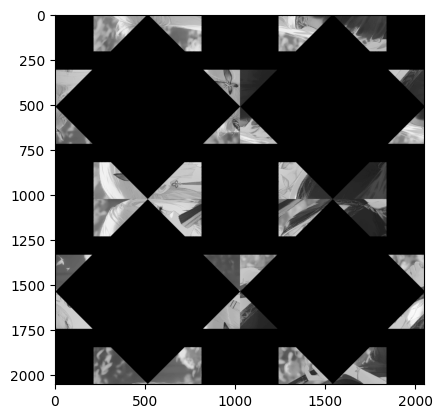

In [477]:
plt.imshow(img, cmap='gray') 
img.shape

Script diatas digunakan untuk menampilkan gambar dalam skala abu-abu ('gray') menggunakan plt.imshow(img, cmap='gray'), dan kemudian mengambil dan meneruskan dimensi gambar menggunakan img.shape.

In [478]:
def togray(image):
    #Membuat kernel (filter) rata-rata 3x3 yang digunakan untuk konvolusi dengan setiap saluran warna gambar. Kernel ini digunakan untuk merata-ratakan nilai piksel di sekitarnya.
    kernelgauss = np.ones((3,3))/9 
    image0 = image[:,:,0]
    image1 = image[:,:,1]
    image2 = image[:,:,2]
    filteredimage0 = cv.filter2D(image0, -1, kernelgauss)
    filteredimage1 = cv.filter2D(image1, -1, kernelgauss)
    filteredimage2 = cv.filter2D(image2, -1, kernelgauss)
    return filteredimage0/3 + filteredimage1/3 + filteredimage2/3

Script diatas berisi fungsi yang digunakan untuk menghasilkan gambar skala abu-abu yang dihasilkan dari rata-rata nilai piksel dari saluran warna merah, hijau, dan biru gambar berwarna image, setelah menerapkan filter rata-rata 3x3 pada setiap saluran warna menggunakan operasi konvolusi.

In [479]:
def rotation(image, degree):
    tinggi, lebar = image.shape
    # mengubah sudut dari derajat menjadi radian.
    rad = degree*(np.pi/180)
    #diinisialisasi dengan nilai 0, dan akan menyimpan gambar hasil rotasi
    rotate_image = np.zeros((tinggi, lebar))
    
    #Menghitung titik tengah (pusat) gambar dalam koordinat (x, y).
    xmid = tinggi // 2
    ymid = tinggi // 2
    
    #Iterasi melalui setiap baris (tinggi) dari gambar.
    for i in range (tinggi):
        # Iterasi melalui setiap kolom (lebar) dari gambar.
        for j in range(lebar):
            x = int((i-xmid)*np.cos(rad) - (j-ymid)*np.sin(rad) + xmid)
            y = int((i-xmid)*np.sin(rad) + (j-ymid)*np.cos(rad) + xmid)
            #Memeriksa apakah  koordinat baru (x, y) berada dalam batas gambar yang asli. 
            #Jika iya, nilai piksel dari posisi (x, y) pada gambar asli (image) akan disalin ke posisi (i, j) pada gambar yang sudah diputar (rotate_image).
            if 0 <= x < tinggi and 0 <= y < lebar:
                rotate_image[i,j] = image[x,y]
    # Mengembalikan gambar yang sudah diputar (rotate_image) setelah semua piksel diproses.
    return rotate_image

Script diatas berisi fungsi yang digunakan untuk melakukan rotasi gambar image sebesar degree derajat menggunakan transformasi geometri.

In [480]:
def mirror (image, axis = "x"):
    
    tinggi, lebar = image.shape
    hasil = np.zeros((tinggi, lebar))
    if(axis == "x"):
        #Iterasi melalui setiap baris (i) dan kolom (j) dari gambar.
        for i in range (tinggi):
            for j in range (lebar):
                #Untuk setiap piksel pada hasil[i, j], salin nilai piksel dari posisi yang dipantulkan dari bawah ke atas (image[tinggi-i-1][j]).
                hasil[i,j] = image[tinggi-i-1][j]
        return hasil
    elif(axis == "y"):
        #Iterasi melalui setiap baris (i) dan kolom (j) dari gambar.
        for i in range(tinggi):
            for j in range(lebar):
                #Untuk setiap piksel pada hasil[i, j], salin nilai piksel dari posisi yang dipantulkan dari kanan ke kiri (image[i][lebar-j-1]).
                hasil[i,j] = image[i][lebar-j-1]
        return hasil
    else:
        print("wrong axis, use 'x' or 'y'")

Script diatas berisi fungsi yang digunakan untuk melakukan operasi mirroring (pemantulan) terhadap gambar (matriks) berdasarkan sumbu yang ditentukan ("x" atau "y" ('axis')). Hasil pemantulan disimpan dalam matriks hasil dan dikembalikan sebagai output dari fungsi.

In [481]:
def addpadd(arr, atas = 0, bawah = 0, kiri = 0, kanan = 0): #alasan di setting = 0, untuk memudahkan ketika ingin menambah hanya padding  kanan saja
    tinggi,lebar = arr.shape
    #Membuat matriks arrhasil yang memiliki dimensi yang lebih besar dari arr
    arrhasil = np.zeros((tinggi+atas+bawah, lebar+kiri+kanan))
    
    #Melakukan iterasi melalui area di dalam matriks arrhasil yang akan diisi dengan nilai dari matriks arr.
    #i dan j mulai dari posisi yang sudah diberi offset sesuai dengan ketebalan padding (atas untuk i dan kiri untuk j).
    for i in range(0+atas, tinggi + atas):
        for j in range(0+kiri, lebar+ kiri):
            #Mengisi nilai arrhasil[i][j] dengan nilai piksel yang sesuai dari matriks arr
            #Untuk mengakses nilai piksel yang benar, kita mengurangi offset padding dari indeks i dan j.
            arrhasil[i][j] = arr[i - atas][j - kiri]
    return arrhasil

Script diatas berisi fungsi addpadd yang digunakan untuk menambahkan padding ke matriks arr dengan ketebalan tertentu diatas, bawah, kiri, dan kanan. Fungsi ini menerima matriks arr sebagai input serta argumen opsional atas, bawah, kiri, dan kanan yang menentukan ketebalan padding untuk setiap sisi matriks.

In [482]:
def translasi(image, x, y):
    
    tinggi,lebar = image.shape
    hasil = np.zeros((tinggi,lebar))
    for i in range (tinggi):
        for j in range(lebar):
            #memeriksa apakah piksel hasil translasi berada dalam batas gambar yang asli
            if 0 <= i + x < tinggi and 0 <= j + y < lebar:
                hasil[i, j] = image[i + x, j + y]
                
    return hasil

Script diatas berisi fungsi translasi, setiap piksel dalam gambar dipindahkan sejauh x satuan ke arah sumbu x dan y satuan ke arah sumbu y. Piksel-piksel yang terletak di luar batas gambar asli tidak akan dimasukkan ke dalam gambar hasil translasi. 

In [483]:
def tambah_citra(citra_pertama, citra_kedua):
    tinggi_pertama, lebar_pertama = citra_pertama.shape
    tinggi_kedua, lebar_kedua = citra_kedua.shape

    start_x = lebar_pertama - lebar_kedua
    start_y = tinggi_pertama - tinggi_kedua


    hasil_gabungan = np.copy(citra_pertama)

    hasil_gabungan[start_y: start_y + tinggi_kedua, start_x: start_x + lebar_kedua] += citra_kedua

    return hasil_gabungan

Script diastas berisi fungsi tambah_citra yang digunakan untuk menggabungkan dua citra atau matriks gambar dengan cara menempatkan citra_kedua di atas citra_pertama pada posisi yang ditentukan.

In [484]:
def tambahatas_citra(citra_pertama, citra_kedua):
    tinggi_pertama, lebar_pertama = citra_pertama.shape
    tinggi_kedua, lebar_kedua = citra_kedua.shape


    start_x = (lebar_pertama - lebar_kedua) // 2  
    start_y = 0


    hasil_gabungan = np.copy(citra_pertama)

    hasil_gabungan[start_y: start_y + tinggi_kedua, start_x: start_x + lebar_kedua] += citra_kedua

    return hasil_gabungan

script diastas berisi fungsi tambahatas_citra yang digunakan untuk menggabungkan atau menempatkan citra kedua di bagian atas citra pertama. Pada fungsi ini citra pertama tetap tidak berubah dan hasil gabung disimpan dalam matriks hasil_gabungan.

In [485]:
def get_histogram(image):
    #membuat  array histogram dengan panjang 256 (0 hingga 255)
    histogram = np.zeros(256, dtype=int)  
    tinggi, lebar = image.shape
    total_pixels = tinggi * lebar  

    for i in range(tinggi):
        for j in range(lebar):
            #Untuk setiap piksel, mengambil intensitasnya dengan mengonversi nilai piksel ke tipe data integer 
            intensity = int(image[i, j])
            #Menggunakan intensitas tersebut sebagai indeks untuk menambahkan jumlah kemunculan intensitas ke dalam histogram
            histogram[intensity] += 1

    #menghitung probabilitas dengan membagi setiap nilai dalam histogram dengan total jumlah piksel
    probability = histogram / total_pixels

    return histogram, probability

Script diastas berisi fungsi tambah_citra yang digunakan untuk menghitung histogram gambar yang merupakan distribusi frekuensi dari intensitas piksel, serta menghitung probabilitas masing-masing intensitas piksel dalam gambar tersebut. Histogram digunakan untuk menganalisis distribusi intensitas warna dalam gambar, sementara probabilitas dapat memberikan informasi lebih lanjut tentang proporsi intensitas piksel dalam gambar.

In [486]:
def histogram_equalization(image):
    histogram, probability = get_histogram(image)  
    tinggi, lebar = image.shape
    L = 255 #nilai maksimumm intensitas piksel  


    cumulative_prob = np.zeros(256)
    cumulative_sum = 0
    for i in range(256):
        #menyimpan jumlah probabilitas kumulatif saat ini.
        cumulative_sum += probability[i]
        #hasil dari cumulative_sum dikalikan dengan L.
        cumulative_prob[i] = cumulative_sum * L
    
    equalized_image = np.zeros_like(image)
    for i in range(tinggi):
        for j in range(lebar):
            #mengambil nilai intensitas setiap piksel, dan mengganti nilai piksel tersebut dengan nilai yang sesuai dari cumulative_prob yang telah dihitung sebelumnya, setelah dibulatkan dengan np.round
            intensity = int(image[i, j])
            equalized_image[i, j] = np.round(cumulative_prob[intensity])  


    equalized_histogram, equalized_probability = get_histogram(equalized_image)

    return equalized_image, equalized_histogram, equalized_probability

Script diastas berisi fungsi thistogram_equalization(image) yang digunakan untuk melakukan proses equalisasi histogram pada gambar dengan menghitung komulatif probabilitas intensitas pikselnya, kemudian mengubah nilai piksel pada gambar sesuai dengan nilai kumulatif tersebut untuk mendapatkan gambar hasil equalisasi. Hasil equalisasi tersebut kemudian dihitung histogramnya untuk melihat distribusi intensitas piksel yang telah diubah.

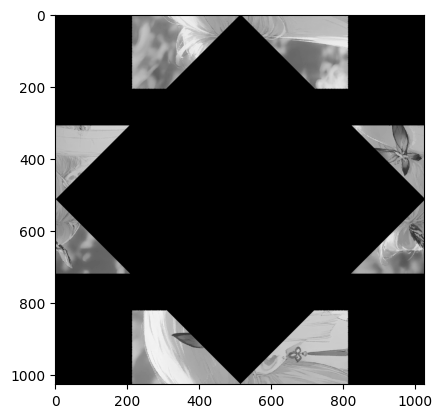

In [487]:
#memotong gambar dengan ukuran 1026x1026 piksel
image = img[:1026, :1026]

plt.imshow(image, cmap="gray")

Script diatas digunaka untuk memotong gambar menjadi bagian yang lebih kecil dengan ukuran 1026x1026 piksel dan menampilkannya menggunakan plt.imshow() dengan colormap "gray".

In [488]:
#mengambil bagian atas kiri dengan rentang tinggi dari 0 sampai 207 dan rentang lebar dari 212 sampai 812.
crop_img1 = image[:207, 212:812]
#mengambil bagian tengah kiri dengan rentang tinggo dari 308 sampai 720 dan lebar dari 0 sampao 410
crop1_img1 = image[308:720, :410]
#mengambil bagian tengah kanan dengan rentang tinggi dari 307 sampai 720 dan rentang lebar dari 726 sampai 1026.
crop2_img1 = image[307:720, 726:1026]
#mengambil bagian bawah kiri dengan rentang tinggi 819 sampai 1026 dan lebar 212 sampai 812
crop3_img1 = image[819:1026, 212:812]

Script diatas digunakan untuk memotong atau melakukan cropping pada bagian gamabr.

In [489]:
crop_pita =crop2_img1[2:206, :300]
crop_pita1 =crop1_img1[1:205, :300]
crop_pita3 =crop3_img1[3:207, 2:302]
crop1_pita3 =crop3_img1[3:207, 302:600]

crop1_pita3.shape

(204, 298)

Script diatas digunakan untuk memotong atau melakukan cropping pada bagian gambar dengan memotong kembali menjadi bagian yang lebih kecil dari hasil yang sudah dipotong sebelumnya.

In [490]:
gabung_pita = tambah_citra(crop_pita3, crop_pita)

pad_gabung = addpadd(gabung_pita, kanan=300)
pad_gabung.shape

(204, 600)

Script diatas digunakan untuk menggabungkan 2 ccitra ('crop_pita3' dan 'crop_pita'), kemudian menambahkan padding sebesar 300 piksel di sebelah kanan dari citra yang telah digabungkan tersebut.

In [491]:
gabung1_pita = tambah_citra(crop_pita1, crop1_pita3)

gabung1_pita.shape

(204, 300)

Script diatas digunakan untuk menggabungkan dua citra (crop_pita1 dan crop1_pita3) menggunakan fungsi tambah_citra, kemudian mengembalikan informasi mengenai dimensi (tinggi dan lebar) dari gambar hasil tersebut dengan menggunakan atribut shape.

(204, 600)

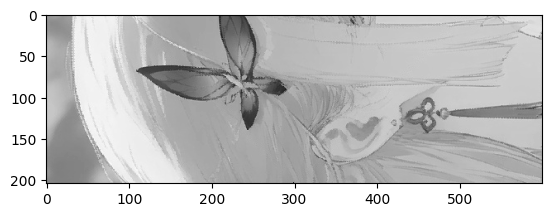

In [492]:
gabung_pita12 = tambah_citra(pad_gabung, gabung1_pita)
plt.imshow(gabung_pita12, cmap="gray")
gabung_pita12.shape

Script diatas digunakan untuk menggabungkan 2 citra ('pad_gabung' dan 'gabung_pita1'), kemudian ditampilkan menggunakan 'imshow' dan memberikan informasi mengenai dimensi (tinggi dan lebar) dari gambar hasil gabungan tersebut dengan mengguakan atribut 'shape'.

In [493]:
crop_rambut = crop1_img1[205:720, :300]
crop_rambut1 = crop2_img1[206:720, :300]
crop_rambut2 = crop_img1[:207, 2:302]
crop_rambut3 = crop_img1[:207, 302:600]

Script diatas digunakan untuk memotong (cropping) pada gambar-gambar yang telah diinisialisasi sebelumnya (crop1_img1, crop2_img1, dan crop_img1). 

In [494]:
gabung_rambut = tambah_citra(crop_rambut, crop_rambut3)
gabung_rambut1 = tambah_citra(crop_rambut1, crop_rambut2)

pad_gabung_rambut = addpadd(gabung_rambut1, kanan=300)

script diatas digunakan untuk menggabungkan 2 citra dan kemudian menambahkan padding sebesar 300 piksel di sebelah kanan dari citra yang telah digabungkan tersebut.

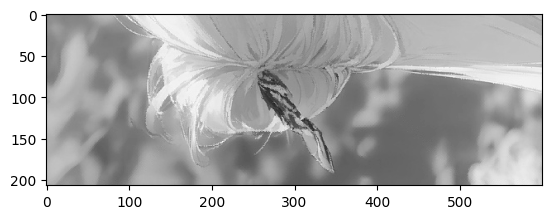

In [495]:
gabung_rambut12 = tambah_citra(pad_gabung_rambut, gabung_rambut)
plt.imshow(gabung_rambut12, cmap="gray")

Script diatas digunakan untuk menggabungkan dua citra (pad_gabung_rambut dan gabung_rambut) menjadi satu citra (gabung_rambut12) dan kemudian menampilkannya menggunakan plt.imshow() dengan skala abu-abu. 

(411, 600)

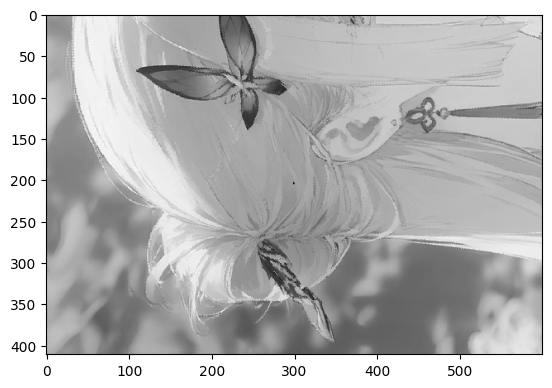

In [496]:
paddatas = addpadd(gabung_rambut12, atas=204)
gabung_rambutpita = tambahatas_citra(paddatas, gabung_pita12)
plt.imshow(gabung_rambutpita, cmap="gray")
gabung_rambutpita.shape

Script diatas digunakan untuk melakukan manipulasi pada citra gabung_rambut12 dengan menambahkan padding di bagian atas, kemudian menambahkan citra gabung_pita12 di bagian atasnya, dan kemudian menampilkan citra hasil manipulasi tersebut dalam bentuk plot gambar dengan skala abu-abu.

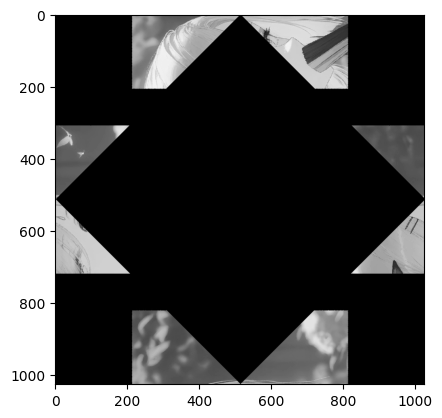

In [497]:
img2 = img[1026:2052, :1026]
plt.imshow(img2, cmap="gray")

Script diatas digunakan untuk mengambil potongan tertentu dari citra img, dengan memilih baris dari 1026 hingga 2051 dan seluruh kolom hingga kolom 1025. Kemudian, plt.imshow(img2, cmap="gray") digunakan untuk menampilkan potongan citra tersebut dalam skala abu-abu menggunakan matplotlib.

In [498]:
crop_img2 = img2[:207, 212:812]
crop1_img2 = img2[308:720, :410]
crop2_img2 = img2[307:720, 726:1026]
crop3_img2 = img2[819:1026, 212:812]

Script diatas digunakan untuk memotong atau mengambil bagian-bagian dari citra img2.

In [499]:
crop_kupu =crop2_img2[2:206, :300]
crop_kupu1 =crop1_img2[1:205, :300]
crop_kupu2 =crop3_img2[3:207, 2:302]
crop_kupu3 =crop3_img2[3:207, 302:600]
crop_kupu3.shape

(204, 298)

Script diatas digunakan untuk memotong (cropping) pada gambar-gambar yang telah diinisialisasi sebelumnya (crop1_img2, crop2_img2, dan crop3_img2). 

In [500]:
gabung_kupu = tambah_citra(crop_kupu2, crop_kupu)
pad_gabung_kupu = addpadd(gabung_kupu, kanan=300)
pad_gabung_kupu.shape

(204, 600)

Script diatas digunakan untuk menggabungkan dua citra crop_kupu2 dan crop_kupu menggunakan fungsi tambah_citra. Kemudian, citra hasil gabungan tersebut dilakukan penambahan padding di sebelah kanan sebanyak 300 piksel menggunakan fungsi addpadd.

In [501]:
gabung_kupu1 = tambah_citra(crop_kupu1, crop_kupu3)
gabung_kupu1.shape

(204, 300)

Script di atas digunakan untuk menggabungkan dua citra, yaitu crop_kupu1 dan crop_kupu3, menggunakan fungsi tambah_citra. 

(204, 600)

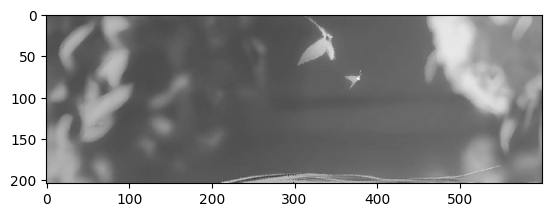

In [502]:
gabung_kupu12 = tambah_citra(pad_gabung_kupu, gabung_kupu1)
plt.imshow(gabung_kupu12, cmap="gray")
gabung_kupu12.shape

Script di atas digunakan untuk menggabungkan dua citra, yaitu pad_gabung_kupu dan gabung_kupu1, menggunakan fungsi tambah_citra dan kemudian ditampilkan menggunakan plt.imshow.

In [503]:
crop_wajah = crop1_img2[205:720, :300]
crop_wajah1 = crop2_img2[206:720, :300]
crop_wajah2 = crop_img2[:207, 2:302]
crop_wajah3 = crop_img2[:207, 302:600]

Script diatas digunakan untuk memotong (cropping) pada gambar-gambar yang telah diinisialisasi sebelumnya (crop1_img2, crop2_img2, dan crop_img2). 

In [504]:
gabung_wajah = tambah_citra(crop_wajah, crop_wajah3)
gabung_wajah1 = tambah_citra(crop_wajah1, crop_wajah2)

pad_gabung_wajah = addpadd(gabung_wajah1, kanan=300)

Script diatas digunakan untuk menggabungkan dua citra, yaitu crop_wajah dan crop_wajah3, serta crop_wajah1 dan crop_wajah2, menggunakan fungsi tambah_citra. Kemudian, citra gabung_wajah1 ditambahkan padding di sebelah kanannya sebanyak 300 piksel menggunakan fungsi addpadd. 

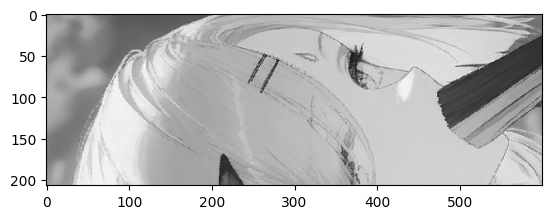

In [505]:
gabung_wajah12 = tambah_citra(pad_gabung_wajah, gabung_wajah)
plt.imshow(gabung_wajah12, cmap="gray")

Script diatas digunakan untuk menggabungkan citra pad_gabung_wajah dan gabung_wajah menggunakan fungsi tambah_citra. Setelah itu, citra gabung_wajah12 ditampilkan dengan menggunakan plt.imshow dengan colormap 'gray'.

(411, 600)

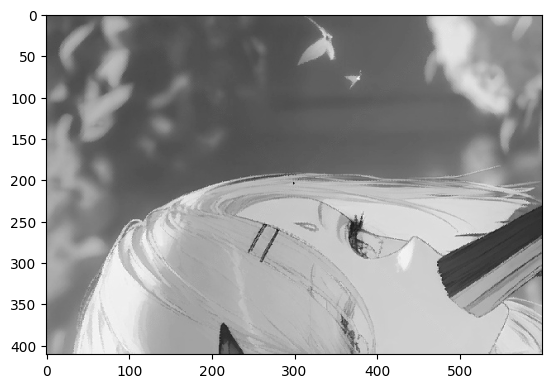

In [506]:
paddatas2 = addpadd(gabung_wajah12, atas=204)
gabung_wajahkupu = tambahatas_citra(paddatas2, gabung_kupu12)
plt.imshow(gabung_wajahkupu, cmap="gray")
gabung_wajahkupu.shape

Script diatas digunakan untuk melakukan manipulasi pada citra gabung_wajah12 dengan menambahkan padding di bagian atas, kemudian menambahkan citra gabung_pita12 di bagian atasnya, dan kemudian menampilkan citra hasil manipulasi tersebut dalam bentuk plot gambar dengan skala abu-abu.

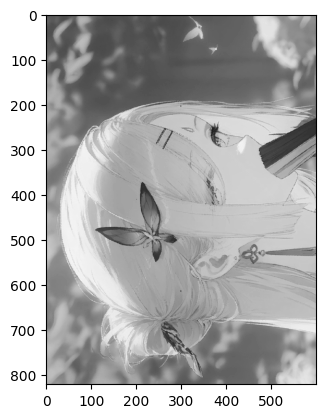

In [507]:
paddfinal_wajah = addpadd(gabung_rambutpita, atas=411)
gabungfinal_wajah = tambahatas_citra(paddfinal_wajah, gabung_wajahkupu)
plt.imshow(gabungfinal_wajah, cmap="gray")

Script di atas digunakan untuk menggabungkan dua citra secara vertikal dengan menempatkan gabung_wajahkupu di atas paddfinal_wajah. Citra paddfinal_wajah diberi padding di bagian atas sebanyak 411 piksel terlebih dahulu menggunakan addpadd. Kemudian, citra gabung_wajahkupu ditambahkan di atas citra yang telah diberi padding tersebut menggunakan tambahatas_citra. Hasilnya adalah citra gabungfinal_wajah, yang kemudian ditampilkan dengan menggunakan plt.imshow dengan colormap 'gray'.

(1026, 1026)

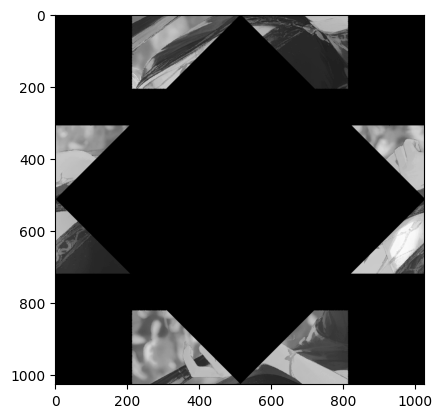

In [508]:
img22 = img[1026:2052, 1026:2052]

plt.imshow(img22, cmap="gray")
img22.shape

Script di atas digunakan untuk mengambil potongan gambar dari img yang dimulai dari baris ke-1026 hingga baris ke-2052 (memiliki tinggi 1026 piksel) dan dari kolom ke-1026 hingga kolom ke-2052 (memiliki lebar 1026 piksel). Setelah itu, potongan gambar tersebut ditampilkan menggunakan plt.imshow dengan colormap 'gray' untuk menunjukkan gambar tersebut dalam skala abu-abu. Kemudian, img22.shape digunakan untuk mengembalikan dimensi dari gambar yang telah dipotong, yaitu (1026, 1026), yang mencerminkan tinggi dan lebar gambar tersebut.

In [509]:
crop_img22 = img22[:207, 212:812]
crop1_img22 = img22[308:720, :410]
crop2_img22 = img22[307:720, 726:1026]
crop3_img22 = img22[819:1026, 212:812]

Script diatas digunakan untuk memotong (cropping) pada gambar-gambar yang telah diinisialisasi sebelumnya (img22). 

In [510]:
crop_tangan =crop2_img22[2:206, :300]
crop_tangan1 =crop1_img22[1:205, :300]
crop_tangan2 =crop3_img22[3:207, 2:302]
crop_tangan3 =crop3_img22[3:207, 302:600]
crop_tangan3.shape

(204, 298)

Script diatas digunakan untuk memotong (cropping) pada gambar-gambar yang telah diinisialisasi sebelumnya (crop2_img22, crop1_img22, dan crop3_img22). 

In [511]:
gabung_tangan = tambah_citra(crop_tangan2, crop_tangan)
pad_gabung_tangan = addpadd(gabung_tangan, kanan=300)
pad_gabung_tangan.shape

(204, 600)

Script diatas digunakan untuk menggabungkan dua citra, yaitu crop_tangan2 dan crop_tangan, menggunakan fungsi gabung_tangan. Kemudian, citra gabung_tangan ditambahkan padding di sebelah kanannya sebanyak 300 piksel menggunakan fungsi addpadd. 

In [512]:
gabung_tangan1 = tambah_citra(crop_tangan1, crop_tangan3)
gabung_tangan1.shape

(204, 300)

Script di atas digunakan untuk menggabungkan dua citra, yaitu crop_tangan1 dan crop_tangan3, menggunakan fungsi gabung_tangan1. 

(204, 600)

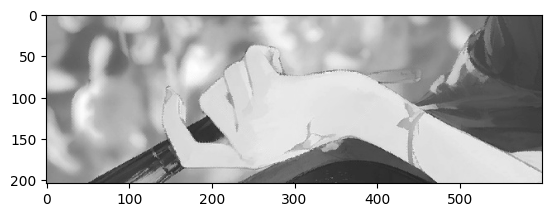

In [513]:
gabung_tangan12 = tambah_citra(pad_gabung_tangan, gabung_tangan1)
plt.imshow(gabung_tangan12, cmap="gray")
gabung_tangan12.shape

Script diatas digunakan untuk menggabungkan citra pad_gabung_tangan dan gabung_tangan1 menggunakan fungsi gabung_tangan12. Setelah itu, citra gabung_tangan12 ditampilkan dengan menggunakan plt.imshow dengan colormap 'gray'.

In [514]:
crop_badan = crop1_img22[205:720, :300]
crop_badan1 = crop2_img22[206:720, :300]
crop_badan2 = crop_img22[:207, 2:302]
crop_badan3 = crop_img22[:207, 302:600]

Script diatas digunakan untuk memotong (cropping) pada gambar-gambar yang telah diinisialisasi sebelumnya (crop1_img22, crop2_img22, dan crop_img22). 

In [515]:
gabung_badan = tambah_citra(crop_badan, crop_badan3)
gabung_badan1 = tambah_citra(crop_badan1, crop_badan2)

pad_gabung_badan = addpadd(gabung_badan1, kanan=300)

Script diatas digunakan untuk menggabungkan dua citra, yaitu crop_badan dan crop_badan3, menggunakan fungsi gabung_badan. Kemudian, citra gabung_badan ditambahkan padding di sebelah kanannya sebanyak 300 piksel menggunakan fungsi addpadd. 

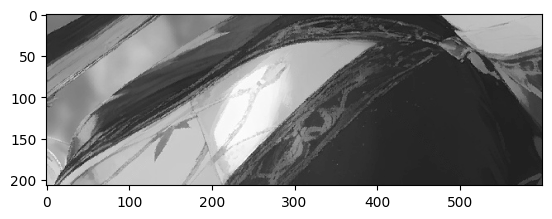

In [516]:
gabung_badan12 = tambah_citra(pad_gabung_badan, gabung_badan)
plt.imshow(gabung_badan12, cmap="gray")

Script diatas digunakan untuk menggabungkan citra pad_gabung_badan dan gabung_badan menggunakan fungsi gabung_badan12. Setelah itu, citra gabung_badan12 ditampilkan dengan menggunakan plt.imshow dengan colormap 'gray'.

(411, 600)

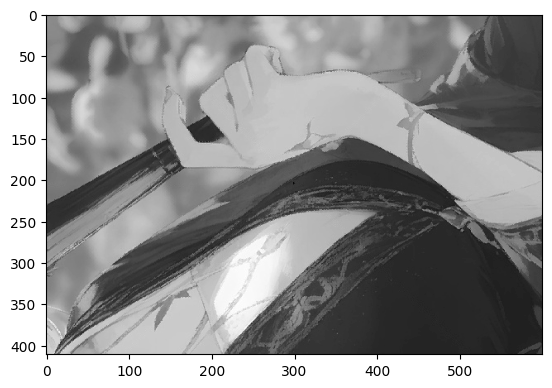

In [517]:
padd_badantangan = addpadd(gabung_badan12, atas=204)
gabung_badantangan = tambahatas_citra(padd_badantangan, gabung_tangan12)
plt.imshow(gabung_badantangan, cmap="gray")
gabung_badantangan.shape

Script diatas digunakan untuk melakukan manipulasi pada citra gabung_badan12 dengan menambahkan padding di bagian atas, kemudian menambahkan citra gabung_tangan12 di bagian atasnya, dan kemudian menampilkan citra hasil manipulasi tersebut dalam bentuk plot gambar dengan skala abu-abu.

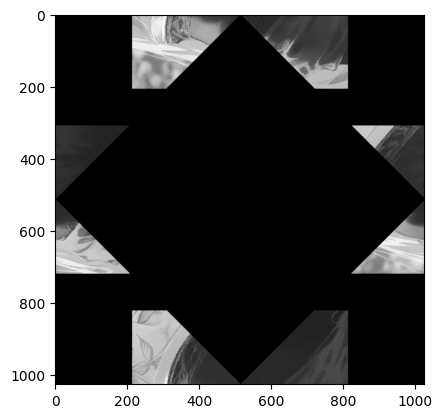

In [518]:
img21 = img[:1026, 1026:2052]
plt.imshow(img21, cmap="gray")

Script di atas digunakan untuk mengambil potongan gambar dari img, dengan menggunakan slicing pada array numpy, script tersebut mengambil bagian dari img yang dimulai dari baris pertama hingga baris ke-1026 (memiliki tinggi 1026 piksel) dan dari kolom ke-1026 hingga kolom ke-2052 (memiliki lebar 1026 piksel). Setelah itu, potongan gambar tersebut ditampilkan menggunakan plt.imshow dengan colormap 'gray' untuk menunjukkan gambar tersebut dalam skala abu-abu.

In [519]:
crop_img21 = img21[:207, 212:812]
crop1_img21 = img21[308:720, :410]
crop2_img21 = img21[307:720, 726:1026]
crop3_img21 = img21[819:1026, 212:812]

Script diatas digunakan untuk memotong (cropping) pada gambar-gambar yang telah diinisialisasi sebelumnya (img21). 

In [520]:
crop_badanb =crop2_img21[2:206, :300]
crop_badanb1 =crop1_img21[1:205, :300]
crop_badanb2 =crop3_img21[3:207, 2:302]
crop_badanb3 =crop3_img21[3:207, 302:600]

Script diatas digunakan untuk memotong (cropping) pada gambar-gambar yang telah diinisialisasi sebelumnya (crop2_img21, crop1_img21, dan crop3_img21). 

In [521]:
gabung_badanb = tambah_citra(crop_badanb2, crop_badanb)
pad_gabung_badanb = addpadd(gabung_badanb, kanan=300)
pad_gabung_badanb.shape

(204, 600)

Script diatas digunakan untuk menggabungkan dua citra, yaitu crop_badanb2 dan crop_badanb, menggunakan fungsi gabung_badanb. Kemudian, citra gabung_badan ditambahkan padding di sebelah kanannya sebanyak 300 piksel menggunakan fungsi addpadd. 

In [522]:
gabung_badanb1 = tambah_citra(crop_badanb1, crop_badanb3)
gabung_badanb1.shape

(204, 300)

Script diatas digunakan untuk menggabungkan citra crop_badanb1 dan crop_badanb3 menggunakan fungsi gabung_badanb1. 

In [523]:
gabung_badanb12 = tambah_citra(pad_gabung_badanb, gabung_badanb1)
gabung_badanb12.shape

(204, 600)

Script diatas digunakan untuk menggabungkan citra pad_gabung_badanb dan gabung_badan1 menggunakan fungsi gabung_badanb12. 

In [524]:
crop_badanr = crop2_img21[206:720, :300]
crop_badanr1 = crop1_img21[205:720, :300]
crop_badanr2 = crop_img21[:207, 2:302]
crop_badanr3 = crop_img21[:207, 302:600]

Script diatas digunakan untuk memotong (cropping) pada gambar-gambar yang telah diinisialisasi sebelumnya (crop2_img21, crop1_img21, dan crop_img21). 

In [525]:
gabung_badanr = tambah_citra(crop_badanr, crop_badanr2)
gabung_badanr1 = tambah_citra(crop_badanr1, crop_badanr3)

pad_gabung_badanr = addpadd(gabung_badanr, kanan=300)

Script diatas digunakan untuk menggabungkan dua citra, yaitu crop_badanr dan crop_badanr2, menggunakan fungsi tambah_citra. Kemudian, citra gabung_badan ditambahkan padding di sebelah kanannya sebanyak 300 piksel menggunakan fungsi addpadd. 

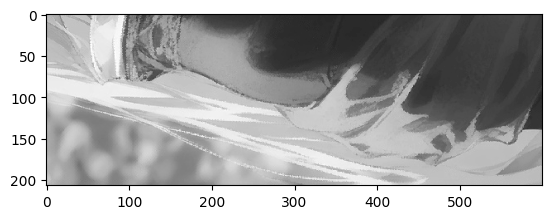

In [526]:
gabung_badanr12 = tambah_citra(pad_gabung_badanr, gabung_badanr1)
plt.imshow(gabung_badanr12, cmap="gray")

Script diatas digunakan untuk menggabungkan citra pad_gabung_badanr dan gabung_badanr1 menggunakan fungsi tambah_citra. Setelah itu, citra gabung_badan12 ditampilkan dengan menggunakan plt.imshow dengan colormap 'gray'.

(411, 600)

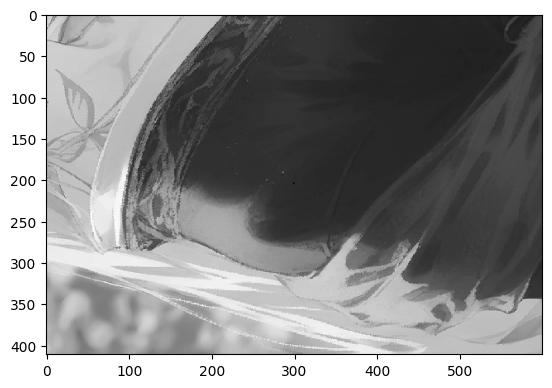

In [527]:
padd_atasbadanbr = addpadd(gabung_badanr12, atas=204)
gabung_atasbadanbr = tambahatas_citra(padd_atasbadanbr, gabung_badanb12)
plt.imshow(gabung_atasbadanbr, cmap="gray")
gabung_atasbadanbr.shape

Script diatas digunakan untuk melakukan manipulasi pada citra gabung_badanr12 dengan menambahkan padding di bagian atas, kemudian menambahkan citra gabung_badanb12 di bagian atasnya, dan kemudian menampilkan citra hasil manipulasi tersebut dalam bentuk plot gambar dengan skala abu-abu.

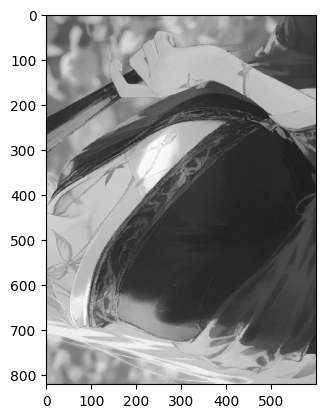

In [528]:
pad_finalbdn = addpadd(gabung_atasbadanbr, atas=411)
gabung_finalbdn = tambahatas_citra(pad_finalbdn, gabung_badantangan)
plt.imshow(gabung_finalbdn, cmap="gray")

Script diatas digunakan untuk menggabungkan dua gambar dengan operasi tambah atas (penambahan citra di atas citra lainnya) setelah melakukan penambahan padding di bagian atas gambar pertama. Hasilnya adalah gambar yang lebih besar dengan citra gabung_badantangan diletakkan di bagian atas pad_finalbdn. Gambar hasil ini kemudian ditampilkan menggunakan plt.imshow dengan colormap 'gray' untuk menunjukkan gambar tersebut dalam skala abu-abu.

(822, 1200)

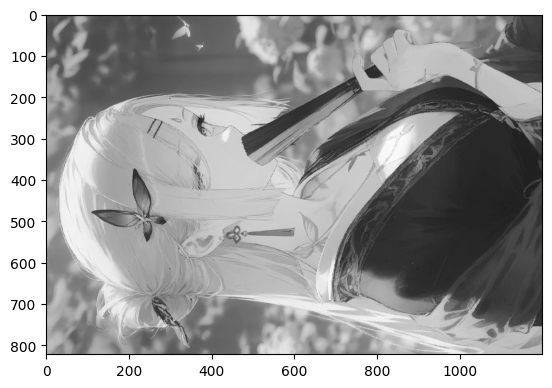

In [529]:
pad_wajahbdn = addpadd(gabungfinal_wajah, kanan=600)
gabung_wajahbdn = tambah_citra(pad_wajahbdn, gabung_finalbdn)
plt.imshow(gabung_wajahbdn, cmap="gray")
gabung_wajahbdn.shape

Script di atas melakukan operasi penambahan padding pada gambar gabungfinal_wajah di sisi kanan sebesar 600 piksel. Kemudian, dilakukan operasi penambahan citra antara gambar pad_wajahbdn dengan gabung_finalbdn, di mana pad_wajahbdn adalah gambar yang telah ditambahkan padding. Hasil dari operasi penambahan citra ini disimpan dalam variabel gabung_wajahbdn.Selanjutnya, gambar gabung_wajahbdn ditampilkan menggunakan plt.imshow dengan colormap 'gray' untuk menunjukkan gambar tersebut dalam skala abu-abu.

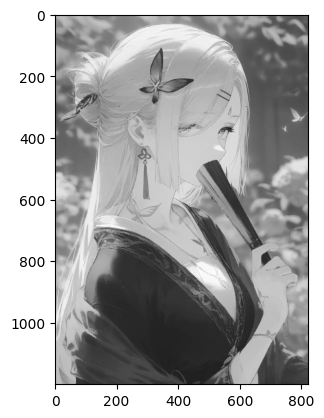

In [530]:
paddfinal = addpadd(gabung_wajahbdn, atas=378)
rotfinal = rotation(paddfinal, 90)
citrafinal = rotfinal[:1200, :822]
plt.imshow(citrafinal, cmap="gray")

2. lakukanlah proses equalisasi terhadapat gambar dari nomer 1 dan tampilkan hasil historgram perbandingannya!

In [531]:
def get_histogram(image):
    #Membuat array numpy dengan panjang 256 yang diinisialisasi dengan nilai 0. 
    #Array ini akan digunakan untuk menghitung frekuensi kemunculan intensitas piksel.
    histogram = np.zeros(256, dtype=int)
    height, width = image.shape
    #Menghitung total jumlah piksel dalam gambar.
    total_pixels = height * width

    #Iterasi untuk Menghitung Histogram:
    for i in range(height):
        for j in range(width):
            intensity = int(image[i, j])
            #Meningkatkan nilai frekuensi pada indeks intensity dalam histogram
            #yang mewakili jumlah kemunculan intensitas piksel tersebut.
            histogram[intensity] += 1

    #Menghitung distribusi probabilitas dari histogram
    probability = histogram / total_pixels
    return histogram, probability


Script diatas berisi fungsi get_histogram digunakan untuk menghitung histogram dan distribusi probabilitas dari sebuah gambar grayscale.

In [532]:
def histogram_equalization(image):
    histogram, probability = get_histogram(image)
    height, width = image.shape
    L = 255 #Nilai maksimal intensitas piksel yang mungkin dalam gambar grayscale

    #Membuat array kosong dengan panjang 256 untuk menyimpan nilai kumulatif probabilitas.
    cumulative_prob = np.zeros(256)
    #Variabel untuk menyimpan jumlah kumulatif dari distribusi probabilitas.
    cumulative_sum = 0

    #Iterasi melalui setiap nilai intensitas piksel (0-255).
    for i in range(256):
        #Menambahkan probabilitas intensitas piksel ke cumulative_sum.
        cumulative_sum += probability[i]
        #Menghitung dan menyimpan nilai kumulatif probabilitas untuk setiap intensitas piksel.
        cumulative_prob[i] = cumulative_sum * L

    #Membuat array numpy yang sama dengan image tetapi diisi dengan nilai nol.
    equalized_image = np.zeros_like(image)
    #Iterasi untuk Memperbarui Intensitas Piksel:
    for i in range(height):
        for j in range(width):
            intensity = int(image[i, j])
            equalized_image[i, j] = np.round(cumulative_prob[intensity])

    equalized_histogram, _ = get_histogram(equalized_image)

    return equalized_image, equalized_histogram

Script diatas berisi fungsi untuk melakukan ekualisasi histogram pada gambar grayscale.

(-0.5, 821.5, 1199.5, -0.5)

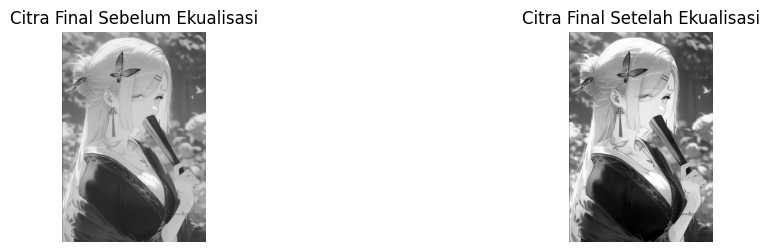

In [533]:
#Proses ekualisasi histogram pada citrafinal
equalized_citrafinal, equalized_histogram = histogram_equalization(citrafinal)

#Menampilkan hasil gambar sebelum dan sesudah ekualisasi histogram
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(citrafinal, cmap='gray')
plt.title('Citra Final Sebelum Ekualisasi')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized_citrafinal, cmap='gray')
plt.title('Citra Final Setelah Ekualisasi')
plt.axis('off')

Script diatas digunakan untuk menampilkan gambar sebelum dan sesudah ekualisasi histogram.

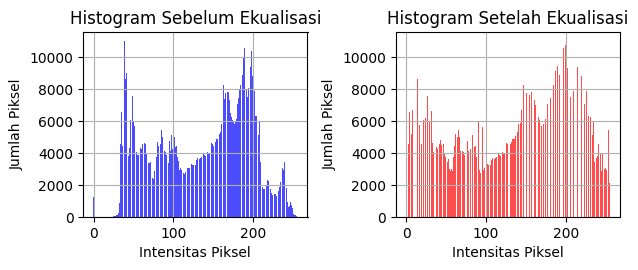

In [534]:
#Menampilkan histogram perbandingan sebelum dan sesudah ekualisasi
#Menyiapkan subplot ketiga dalam grid 2x2 untuk menampilkan histogram citra sebelum ekualisasi.
plt.subplot(2, 2, 3)
plt.bar(np.arange(256), get_histogram(citrafinal)[0], color='b', alpha=0.7)
plt.title('Histogram Sebelum Ekualisasi')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.grid(True)

#Menyiapkan subplot keempat dalam grid 2x2 untuk menampilkan histogram citra setelah ekualisasi.
plt.subplot(2, 2, 4)
plt.bar(np.arange(256), equalized_histogram, color='r', alpha=0.7)
plt.title('Histogram Setelah Ekualisasi')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.grid(True)

#Menyesuaikan layout plot untuk memastikan tidak ada tumpang tindih antara subplot.
plt.tight_layout()
plt.show()

Script diatas digunakan untuk menampilkan perbandingan histogram sebelum dan sesudah ekualisasi menggunakan subplot dan matplotlib. 

3. lakukan spesifikasi gambar shenhe dengan target dari masing masing gambar kurumi dan megumin dan 
analisislah hasilnya dan simpulkan bagaimana hasil tersebut bisa menjadi seperti itu!

In [535]:
target1 = plt.imread("kurumi.jpg")
target2 = plt.imread("megumin.jpg")

target1_gray = togray(target1)
target2_gray = togray(target2)

In [536]:
def calculate_histogram(image, num_bins):
    # Membuat array kosong untuk menyimpan histogram dengan jumlah bin yang ditentukan
    histogram = np.zeros(num_bins, dtype=int)
    # Loop melalui baris citra
    for i in image:
        # Loop melalui piksel di setiap baris
        for j in i:
            # Menghitung indeks bin histogram untuk intensitas piksel saat ini
            bin_index = int(j * num_bins / 256)
            # Menambahkan frekuensi kemunculan intensitas piksel ke bin histogram yang sesuai
            histogram[bin_index] += 1
    # Mengembalikan histogram citra dengan jumlah bin yang telah dihitung
    return histogram

Script diatas berisi fungsi calculate_histogram yang digunakan untuk menghitung histogram dari citra grayscale.

In [537]:
def specify_histogram(source_image, target_image, num_bins):
    # Menghitung histogram citra sumber dan citra target
    hist_source = calculate_histogram(source_image, num_bins)
    hist_target = calculate_histogram(target_image, num_bins)
    
    # Menghitung fungsi kumulatif dari histogram citra target secara manual
    cdf_target = np.zeros_like(hist_target, dtype=float)
    cdf_target[0] = hist_target[0]
    for i in range(1, num_bins):
        cdf_target[i] = cdf_target[i - 1] + hist_target[i]
    cdf_target /= cdf_target[-1]
    
    # Menghitung nilai kumulatif histogram dari citra sumber secara manual
    source_cdf = np.zeros_like(hist_source, dtype=float)
    source_cdf[0] = hist_source[0]
    for i in range(1, 256):
        source_cdf[i] = source_cdf[i - 1] + hist_source[i]
    source_cdf /= source_cdf[-1]
    
    # Membuat lookup table (LUT) untuk pemetaan intensitas
    lut = np.zeros(256)
    
    # Memetakan nilai piksel dari citra sumber ke citra target
    for i in range(256):
        # Menghitung nilai kumulatif histogram citra sumber hingga piksel saat ini
        source_cdf_value = source_cdf[i]
        
        # Menemukan indeks terdekat dalam cdf_target secara manual
        closest_idx = 0
        min_diff = float('inf')
        for j in range(num_bins):
            diff = abs(cdf_target[j] - source_cdf_value)
            if diff < min_diff:
                min_diff = diff
                closest_idx = j
        # Menyimpan indeks
        lut[i] = closest_idx
    
    # Melakukan pemetaan intensitas piksel sesuai dengan lut
    matched_image = lut[source_image.astype(int)]
    
    # Menyimpan nilai piksel dalam rentang 0-255
    # Menyimpan nilai piksel dalam rentang 0-255 secara manual
    matched_image[matched_image < 0] = 0  # Mengganti nilai negatif dengan 0
    matched_image[matched_image > 255] = 255  # Mengganti nilai yang melebihi 255 dengan 255
    matched_image = matched_image.astype(np.uint8)  # Mengonversi tipe data menjadi unsigned 8-bit integer
    
    return matched_image

Script diatas berisi fungsi specify_histogram yang digunakan untuk melakukan spesifikasi histogram antara citra sumber (source_image) dan citra target (target_image).

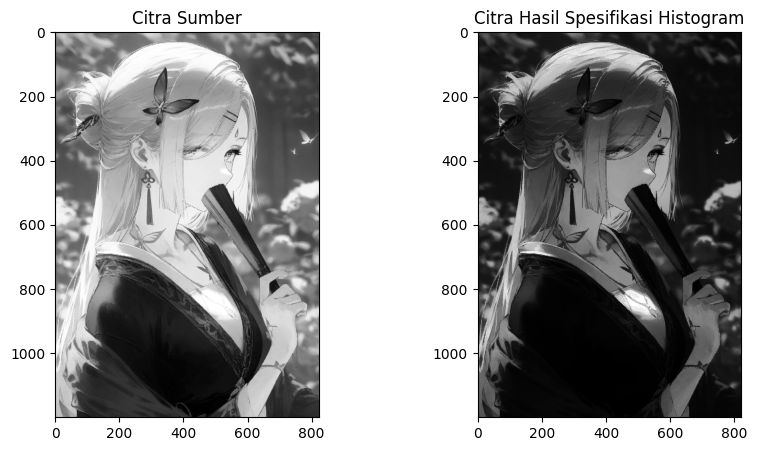

In [538]:
# Menentukan jumlah bin
num_bins = 256

# Melakukan spesifikasi histogram
adjusted_image = specify_histogram(equalized_citrafinal, target1_gray, num_bins)

# Menampilkan citra hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized_citrafinal, cmap='gray')
plt.title('Citra Sumber')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image, cmap='gray')
plt.title('Citra Hasil Spesifikasi Histogram')
plt.show()

4. pecahlah citra shenhe itu menjadi beberapa kombinasi dan berdarakan kondisi tertentu pecahan tersebut akan 
di spesifikasi terhadap citra megumin atau kurum!

In [539]:
# Fungsi untuk melakukan spesifikasi histogram
def histogram_specification(image_array, target_image):
    # Hitung histogram dari citra target
    target_hist = calculate_histogram(target_image, num_bins=256)
    
    # Hitung histogram dari citra input
    input_hist = calculate_histogram(image_array, num_bins=256)
    
    # Laluankan spesifikasi histogram
    matched_image = specify_histogram(image_array, target_image, num_bins=256)
    
    return matched_image

In [540]:
image_array = np.array(citrafinal)

# Bagi citra menjadi m x n bagian
m = 16  # Jumlah baris
n = 16  # Jumlah kolom

# Ukuran citra
height, width = image_array.shape

# Ukuran bagian masing-masing
tile_height = height // m
tile_width = width // n

In [541]:
# Potong citra menjadi bagian-bagian
tiles = []
for i in range(m):
    for j in range(n):
        y_start = i * tile_height
        y_end = (i + 1) * tile_height
        x_start = j * tile_width
        x_end = (j + 1) * tile_width
        
        # Ambil bagian citra
        tile = image_array[y_start:y_end, x_start:x_end]
        
        # Lakukan thresholding dan spesifikasi histogram sesuai dengan nilai ambang
        if np.mean(tile) <= 128:
            tile = histogram_specification(tile, target1_gray)
        else:
            tile = histogram_specification(tile, target2_gray)
        
        tiles.append(tile) 

In [542]:
# Inisialisasi gambar menyatu kembali
merged_image = np.zeros_like(image_array)

# Susun kembali citra
idx = 0
for i in range(m):
    for j in range(n):
        y_start = i * tile_height
        y_end = (i + 1) * tile_height
        x_start = j * tile_width
        x_end = (j + 1) * tile_width
        
        # Tempatkan bagian citra di gambar menyatu kembali
        merged_image[y_start:y_end, x_start:x_end] = tiles[idx]
        idx += 1

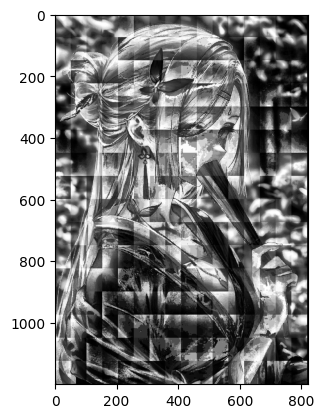

In [543]:
# Tampilkan gambar menyatu kembali

plt.imshow(merged_image, cmap="gray")

5. Analisis lah hasil beberapa hasil gambar tersebut dan simpulkan apa yang bisa di dapat dari melakukan 
spesifikasi dan spesifikasi terhadap segmentasi citra!

Dengan menggunakan dua citra referensi yang berbeda berdasarkan kecerahan setiap bagian gambar, kita bisa meningkatkan kontras dan detail dengan lebih spesifik. Jika bagian gambar terang (di atas 128), kita gunakan gambar "megumin.jpg" untuk mempertahankan ketajaman visualnya. Sedangkan jika bagian gambar gelap (di bawah atau sama dengan 128), kita pakai gambar "kurumi.jpg" untuk memperbaiki kontras dan detailnya. Dengan pendekatan ini, hasilnya jadi lebih baik secara keseluruhan, terutama dalam kontras dan detail gambar.